# comparisons

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re


# Function to load and process data
def load_reward_data(pattern, epoch_from=0, epoch_to=300):
    all_rewards = []
    
    # Use glob to find all files matching the initial pattern
    csv_files = glob.glob(pattern)
    
    # Filter files where the wildcard is a number using regex
    csv_files = [file for file in csv_files if re.search(r'.*all\d+\.csv$', file)]
    
    for file in csv_files:
        df = pd.read_csv(file)[epoch_from:epoch_to]
        all_rewards.append(df['reward'].reset_index(drop=True))
    
    combined_rewards_df = pd.concat(all_rewards, axis=1)
    mean_reward = combined_rewards_df.mean(axis=1)
    std_reward = combined_rewards_df.std(axis=1)
    
    return all_rewards, mean_reward, std_reward


def plot_reward(pattern_mine, pattern_original, label_mine, label_original, epoch_from=0, epoch_to=300, plot_individual=False):
    
    # Load and process the data for both sets
    rewards_cross_att, mean_reward_cross_att, std_reward_cross_att = load_reward_data(pattern_mine, epoch_from, epoch_to)
    rewards_caac, mean_reward_caac, std_reward_caac = load_reward_data(pattern_original, epoch_from, epoch_to)

    # Apply smoothing using a rolling window
    window_size = 10
    smoothed_mean_reward_cross_att = mean_reward_cross_att.rolling(window=window_size, min_periods=1).mean()
    smoothed_std_reward_cross_att = std_reward_cross_att.rolling(window=window_size, min_periods=1).mean()

    smoothed_mean_reward_caac = mean_reward_caac.rolling(window=window_size, min_periods=1).mean()
    smoothed_std_reward_caac = std_reward_caac.rolling(window=window_size, min_periods=1).mean()

    # Plotting the results
    plt.figure(figsize=(10, 6))

    if plot_individual:
        # Plot individual lines for Cross Attention
        for i, reward in enumerate(rewards_cross_att):
            plt.plot(reward, color='blue', alpha=0.3, linewidth=1, label=f'{label_mine}' if i == 0 else "")

    # Plot the smoothed mean and shaded std for Cross Attention
    plt.plot(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att, color='blue', linewidth=2, 
             label=f'Avg Reward - {label_mine}')
    plt.fill_between(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att - smoothed_std_reward_cross_att, 
                     smoothed_mean_reward_cross_att + smoothed_std_reward_cross_att, color='blue', alpha=0.2, 
                     label=f'Std Dev - {label_mine}')
    
    if plot_individual:
        # Plot individual lines for CAAC
        for i, reward in enumerate(rewards_caac):
            plt.plot(reward, color='red', alpha=0.3, linewidth=1, label=f'{label_original}' if i == 0 else "")

    # Plot the smoothed mean and shaded std for CAAC
    plt.plot(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac, color='red', linewidth=2, 
             label=f'Avg Reward - {label_original}')
    plt.fill_between(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac - smoothed_std_reward_caac, 
                     smoothed_mean_reward_caac + smoothed_std_reward_caac, color='red', alpha=0.2, 
                     label=f'Std Dev - {label_original}')

    plt.title(f'Training Reward - {label_mine} vs {label_original}')
    plt.xlabel('Episode')
    plt.ylabel('Training Reward')
    plt.legend()
    plt.grid(True)
    plt.show()



# Function to load and process data
def load_bunching_data(pattern, epoch_from=0, epoch_to=300):
    all_rewards = []
    
    # Use glob to find all files matching the initial pattern
    csv_files = glob.glob(pattern)
    
    # Filter files where the wildcard is a number using regex
    csv_files = [file for file in csv_files if re.search(r'.*all\d+\.csv$', file)]
    
    for file in csv_files:
        df = pd.read_csv(file)[epoch_from:epoch_to]
        all_rewards.append(df['bunching'].reset_index(drop=True))
    
    combined_rewards_df = pd.concat(all_rewards, axis=1)
    mean_reward = combined_rewards_df.mean(axis=1)
    std_reward = combined_rewards_df.std(axis=1)
    
    return all_rewards, mean_reward, std_reward


def plot_bunching(pattern_mine, pattern_original, label_mine, label_original, epoch_from=0, epoch_to=300, plot_individual=False):
    # Load and process the data for both sets
    rewards_cross_att, mean_reward_cross_att, std_reward_cross_att = load_bunching_data(pattern_mine, epoch_from, epoch_to)
    rewards_caac, mean_reward_caac, std_reward_caac = load_bunching_data(pattern_original, epoch_from, epoch_to)

    # Apply smoothing using a rolling window
    window_size = 10
    smoothed_mean_reward_cross_att = mean_reward_cross_att.rolling(window=window_size, min_periods=1).mean()
    smoothed_std_reward_cross_att = std_reward_cross_att.rolling(window=window_size, min_periods=1).mean()

    smoothed_mean_reward_caac = mean_reward_caac.rolling(window=window_size, min_periods=1).mean()
    smoothed_std_reward_caac = std_reward_caac.rolling(window=window_size, min_periods=1).mean()

    # Plotting the results
    plt.figure(figsize=(10, 6))
    
    if plot_individual:
        # Plot individual lines for Cross Attention
        for i, reward in enumerate(rewards_cross_att):
            plt.plot(reward, color='blue', alpha=0.3, linewidth=1, label=f'{label_mine}' if i == 0 else "")

    # Plot the smoothed mean and shaded std for Cross Attention
    plt.plot(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att, color='blue', linewidth=2, 
             label=f'Avg Bunchings - {label_mine}')
    plt.fill_between(smoothed_mean_reward_cross_att.index, smoothed_mean_reward_cross_att - smoothed_std_reward_cross_att, 
                     smoothed_mean_reward_cross_att + smoothed_std_reward_cross_att, color='blue', alpha=0.2, 
                     label=f'Std Dev - {label_mine}')
    if plot_individual:
        # Plot individual lines for CAAC
        for i, reward in enumerate(rewards_caac):
            plt.plot(reward, color='red', alpha=0.3, linewidth=1, label=f'{label_original}' if i == 0 else "")

    # Plot the smoothed mean and shaded std for CAAC
    plt.plot(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac, color='red', linewidth=2, 
             label=f"Avg Bunchings - {label_original}")
    plt.fill_between(smoothed_mean_reward_caac.index, smoothed_mean_reward_caac - smoothed_std_reward_caac, 
                     smoothed_mean_reward_caac + smoothed_std_reward_caac, color='red', alpha=0.2, 
                     label=f'Std Dev - {label_original}')

    plt.title(f'Bunching Times - {label_mine} vs {label_original}')
    plt.xlabel('Episode')
    plt.ylabel('Bunching')
    plt.legend()
    plt.grid(True)
    plt.show()
    

# SMART vs Active Only

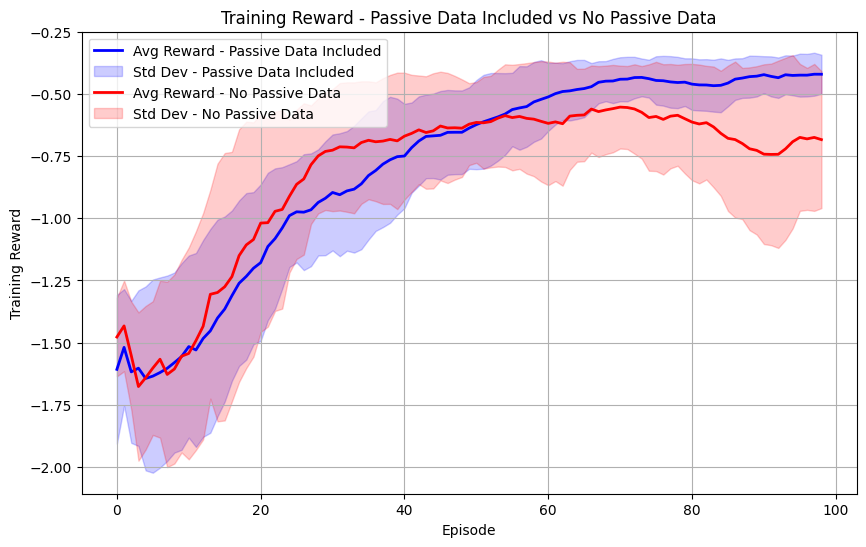

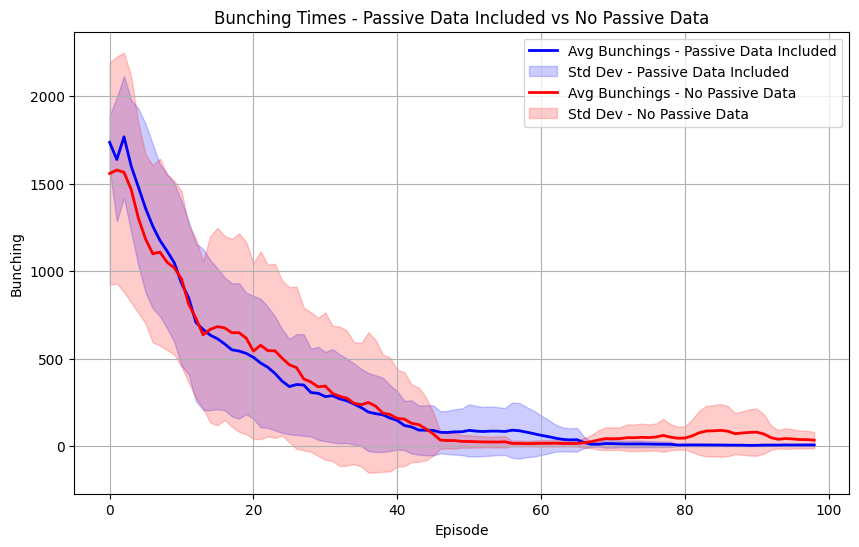

In [9]:
pattern_mine = './log/A_0_1TD3_Distill2all*.csv'
pattern_original = './log/A_0_1TD3_Distill_ActiveOnly2all*.csv'

plot_reward(pattern_mine, pattern_original, "With Passive Data", "Without Passive Data", 0, 100)
plot_bunching(pattern_mine, pattern_original, "With Passive Data", "With Passive Data", 0, 100)

# ORIGINAL vs Cross-Attention

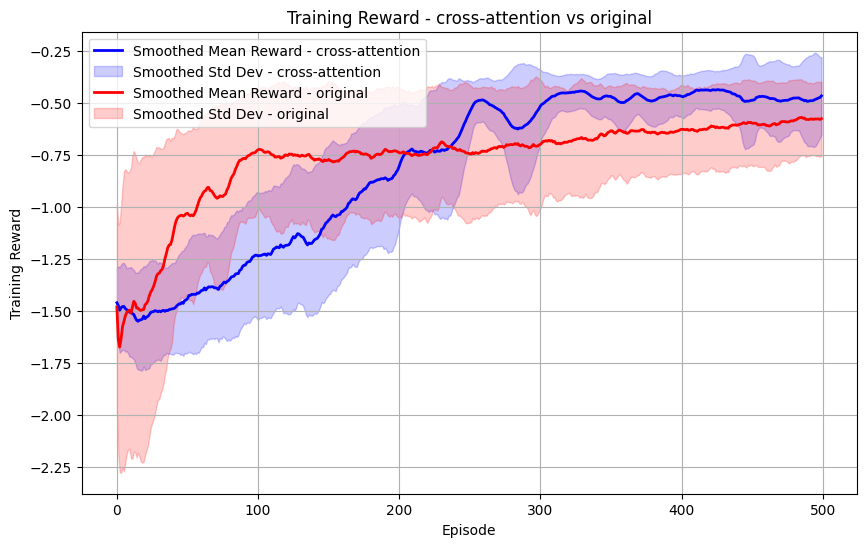

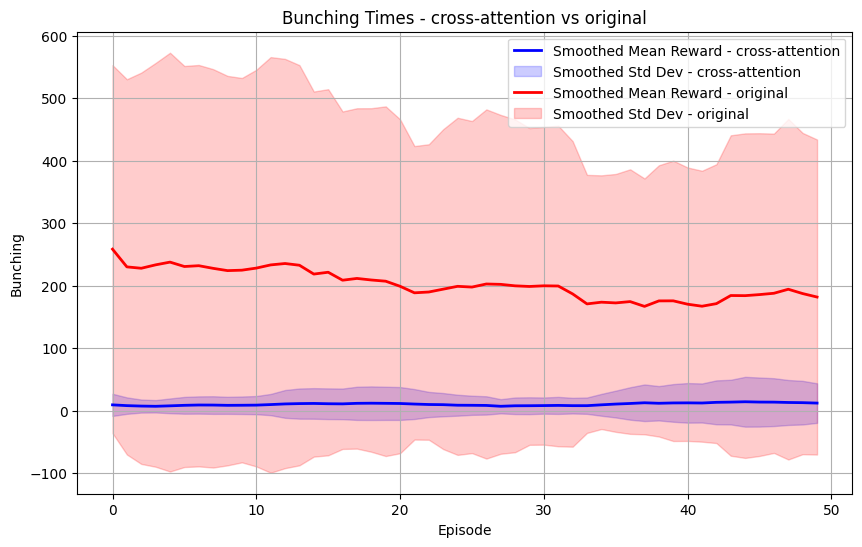

In [2]:
# pattern_mine = './log/A_0_1CAAC_cross_att2all*.csv'
pattern_mine = './log--1105/A_0_1td3-version82all*.csv'
pattern_original = './log--1105/A_0_1caac_original2all*.csv'

plot_reward(pattern_mine, pattern_original, "cross-attention", "original", 0, 500)
plot_bunching(pattern_mine, pattern_original, "cross-attention", "original", 450, 500)

# ORIGINAL vs Cross-Attention + TD3

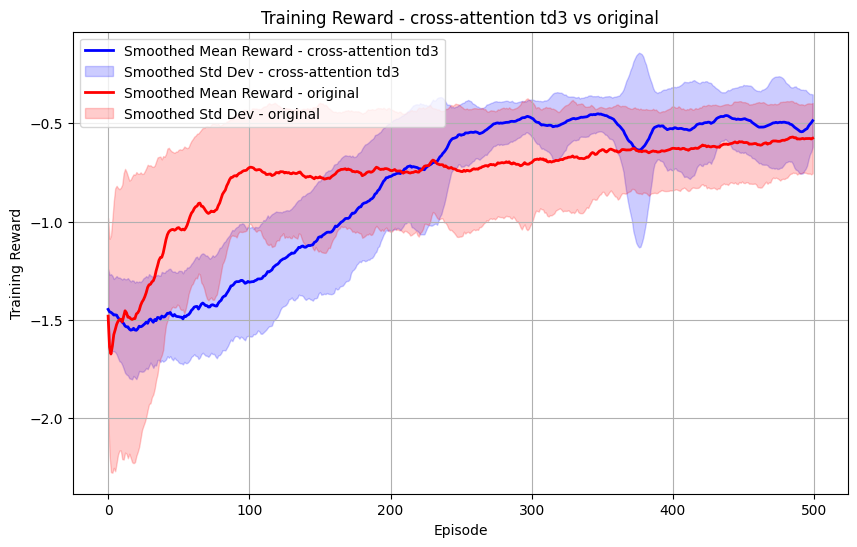

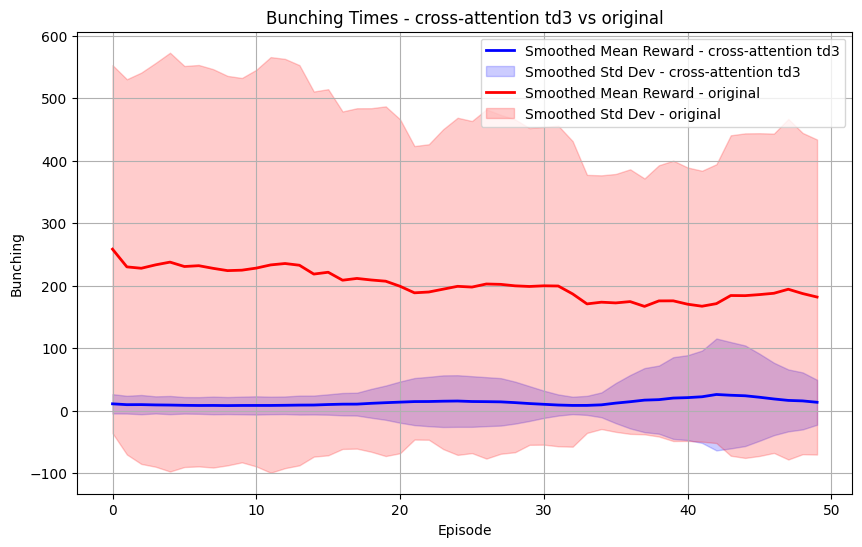

In [13]:
pattern_mine = './log--1105/A_0_1td3-version102all*.csv'
pattern_original = './log--1105/A_0_1caac_original2all*.csv'

plot_reward(pattern_mine, pattern_original, "cross-attention td3", "original", 0, 500)
plot_bunching(pattern_mine, pattern_original, "cross-attention td3", "original", 450, 500)

# our solution: Original vs combo (cross-attention+td3, extra information, attention both actor and critic)

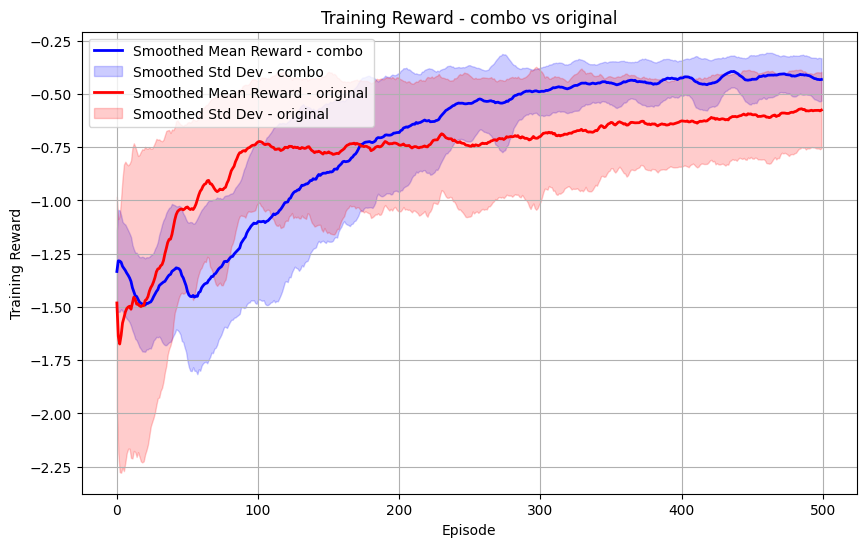

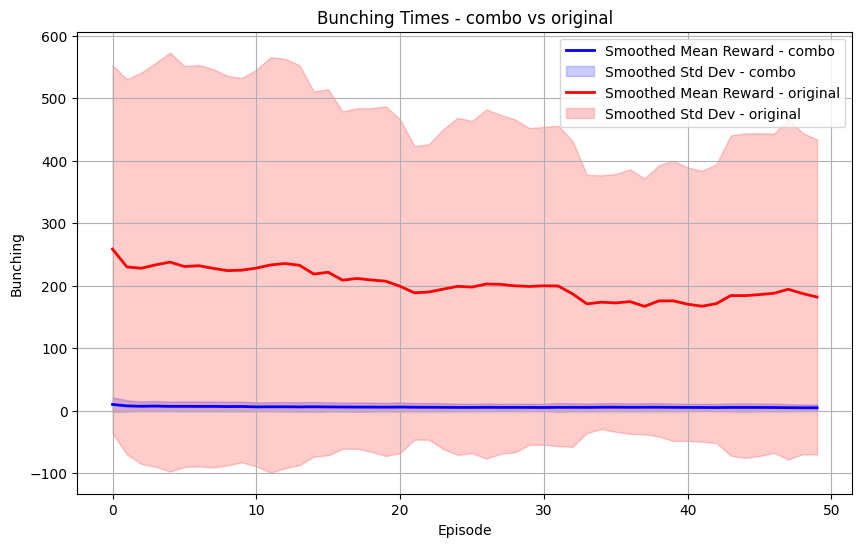

In [3]:
pattern_mine = './log--1105/A_0_1td3-version152all*.csv'
pattern_original = './log--1105/A_0_1caac_original2all*.csv'

plot_reward(pattern_mine, pattern_original, "combo", "original", 0, 500)
plot_bunching(pattern_mine, pattern_original, "combo", "original", 450, 500)

# cross attn vs combo

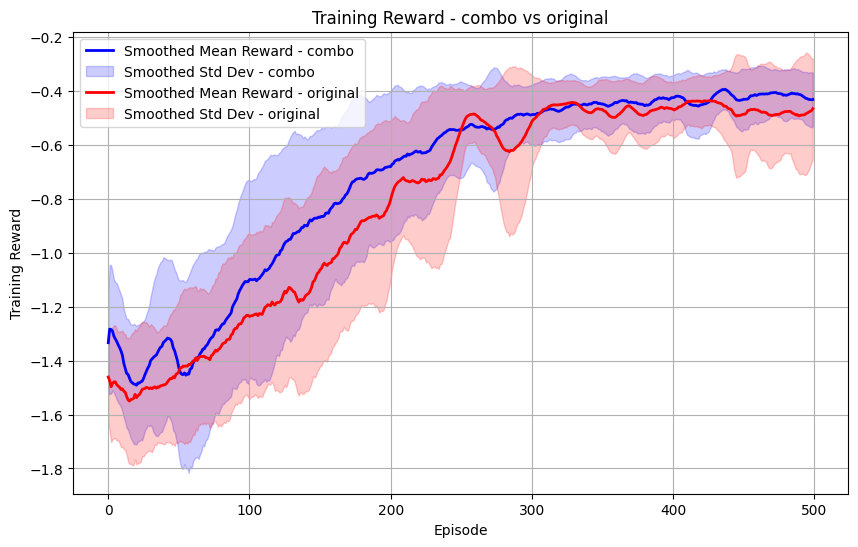

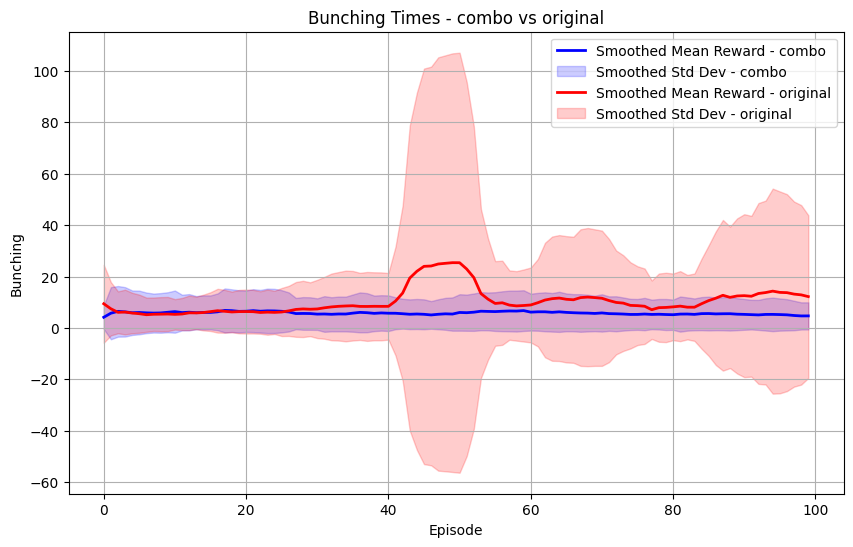

In [17]:
pattern_mine = './log--1105/A_0_1td3-version152all*.csv'
pattern_original = './log--1105/A_0_1td3-version82all*.csv'

plot_reward(pattern_mine, pattern_original, "combo", "original", 0, 500)
plot_bunching(pattern_mine, pattern_original, "combo", "original", 400, 500)

# Combo (td3+cross attention) vs Distill

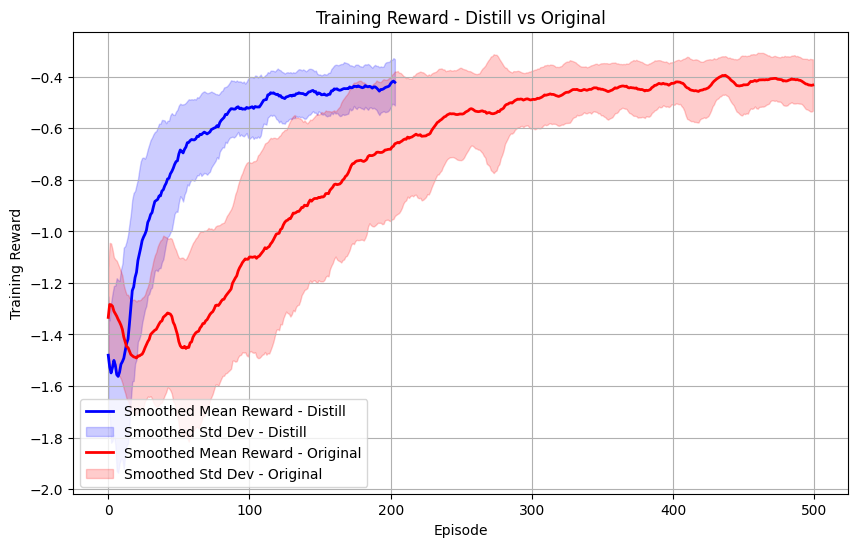

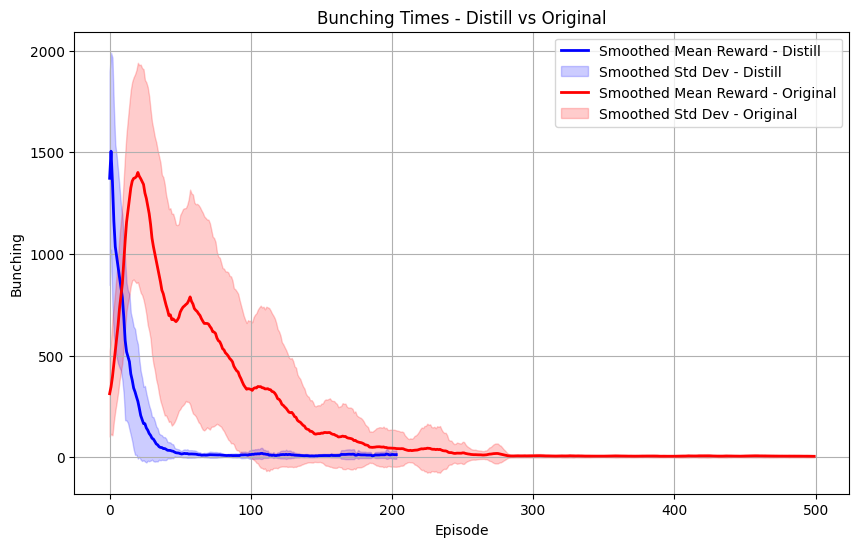

In [10]:
pattern_mine = './log/A_0_1td3-version172all*.csv'
# pattern_original = './log--1105/A_0_1caac_original2all*.csv'
pattern_original = './log--1105/A_0_1td3-version152all*.csv'

plot_reward(pattern_mine, pattern_original, "Distill", "Original", 0, 500)
plot_bunching(pattern_mine, pattern_original, "Distill", "Original", 0, 500)

# version 16 vs 15 (version 16: ego + event for actor_learn )

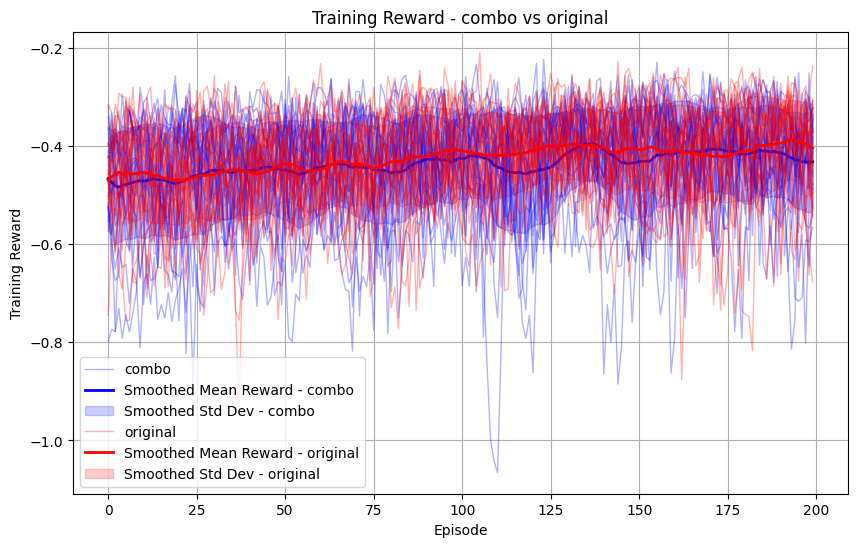

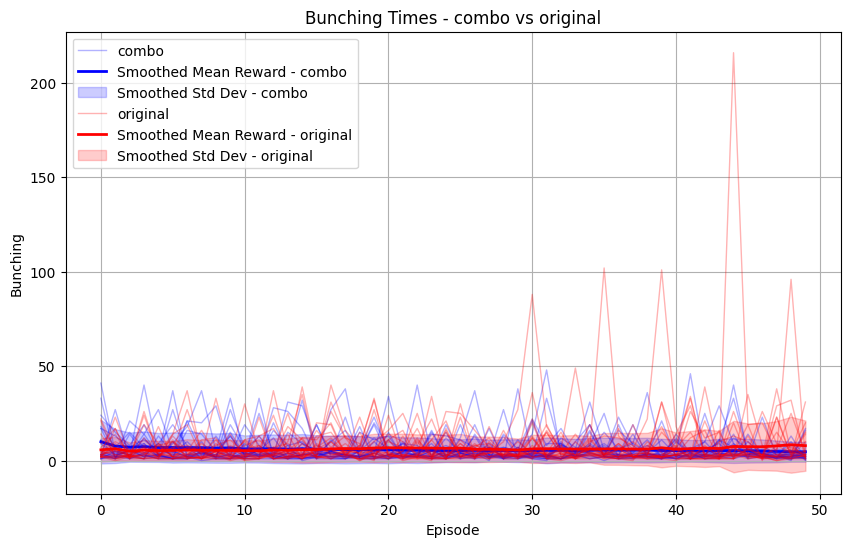

In [41]:
pattern_mine = './log/A_0_1td3-version152all*.csv'
pattern_original = './log/A_0_1td3-version162all*.csv'

plot_reward(pattern_mine, pattern_original, "combo", "original", 300, 500)
plot_bunching(pattern_mine, pattern_original, "combo", "original", 450, 500)